In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [61]:
df = pd.read_csv('top_insta_influencers_data.csv')

print(data.head())



   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  


In [65]:
G = nx.Graph()

#add nodes with attributes
for index, row in df.iterrows():
    G.add_node(row['channel_info'], 
               followers=row['followers'], 
               avg_likes=row['avg_likes'], 
               influence_score=row['influence_score'], 
               country=row['country'])

#Simulate edges based on common criteria
for i in range(len(df)):
    for j in range(i + 1, len(df)):
       if df.loc[i, 'country'] == df.loc[j, 'country']:  # Edges based on country similarity
            G.add_edge(df.loc[i, 'channel_info'], df.loc[j, 'channel_info'])
       elif abs(df.loc[i, 'influence_score'] - df.loc[j, 'influence_score']) <= 5:  # Edges based on similar influence scores
            G.add_edge(df.loc[i, 'channel_info'], df.loc[j, 'channel_info'])




            Username  Degree Centrality  Betweenness Centrality  \
189     shaymitchell           0.834171                0.002731   
89          ladygaga           0.834171                0.002731   
61         willsmith           0.839196                0.003133   
96        hudabeauty           0.839196                0.003133   
118             zayn           0.839196                0.003133   
63            anitta           0.839196                0.003133   
121  thenotoriousmma           0.839196                0.003133   
123     natgeotravel           0.839196                0.003133   
135  brunamarquezine           0.824121                0.002387   
171           eminem           0.824121                0.002387   

     Eigenvector Centrality  
189                0.089624  
89                 0.089624  
61                 0.089516  
96                 0.089516  
118                0.089516  
63                 0.089516  
121                0.089516  
123                0.0

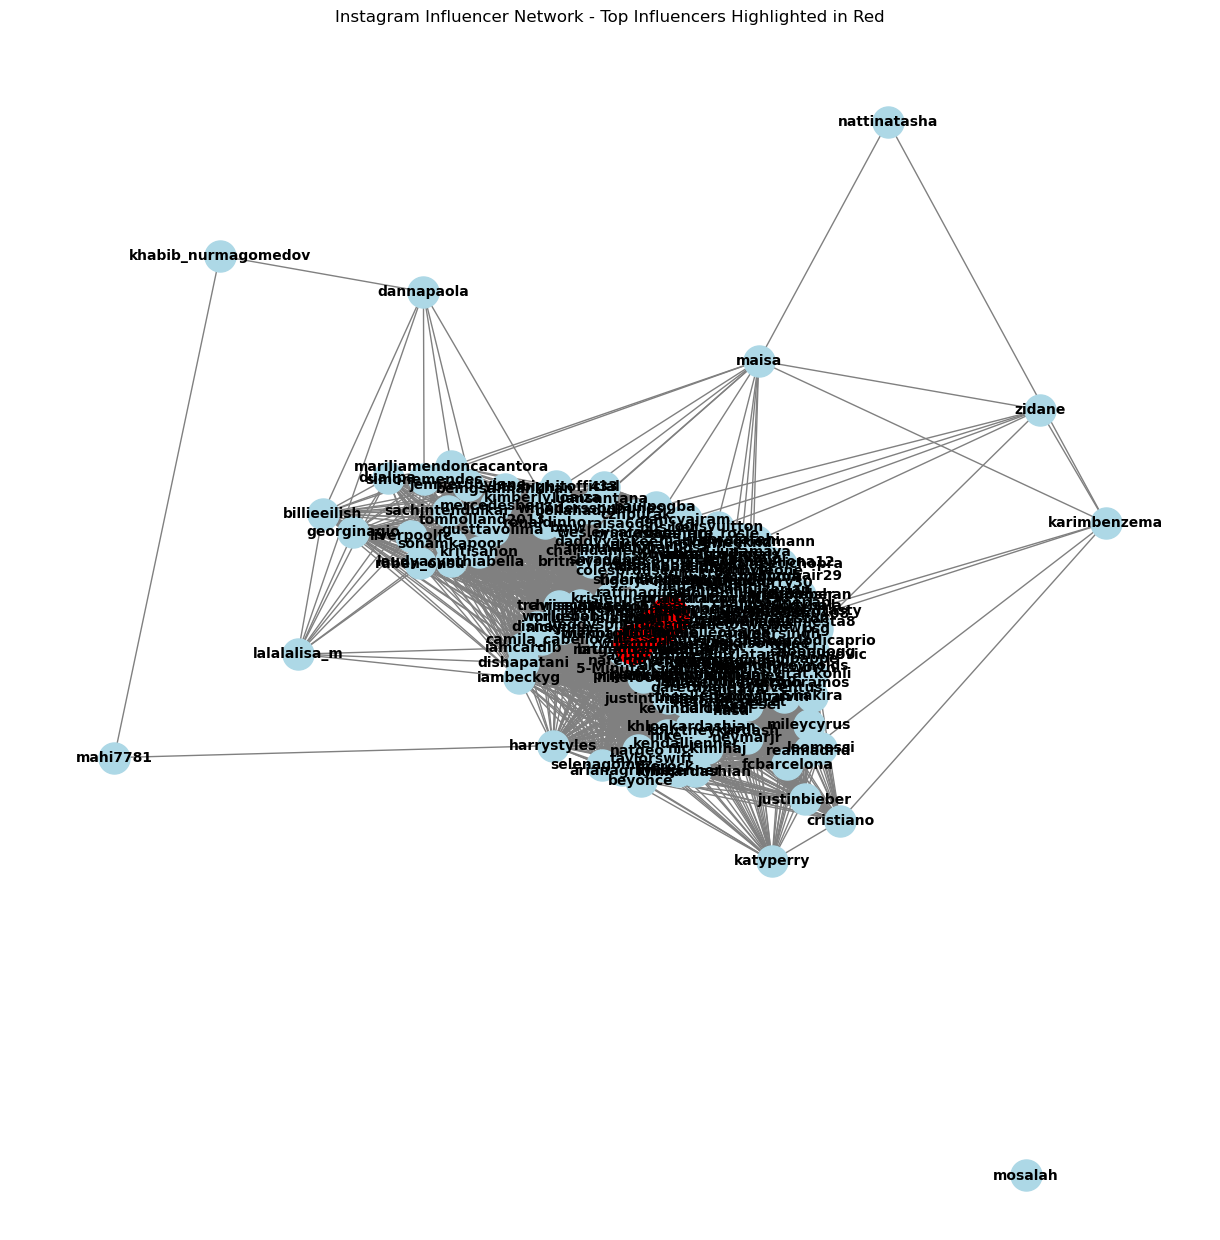

In [71]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

#Create a dataframe to store centrality measures
centrality_df = pd.DataFrame({
    'Username': list(degree_centrality.keys()),
    'Degree Centrality': list(degree_centrality.values()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Eigenvector Centrality': list(eigenvector_centrality.values())
})

#Sort by Eigenvector Centrality
important_influencers = centrality_df.sort_values('Eigenvector Centrality', ascending=False)
print(important_influencers.head(10))

# Visualize the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')

# Highlight important nodes (top influencers) in red
top_influencers = important_influencers['Username'].head(3).tolist()
nx.draw_networkx_nodes(G, pos, nodelist=top_influencers, node_color='red', node_size=800)

plt.title('Instagram Influencer Network - Top Influencers Highlighted in Red')
plt.show()

centrality_df.to_csv('influencer_centrality_measures.csv', index=False)